In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request as request
import json
import datetime

# Primo grafico R0

In [2]:
factor = 13 # Ultimo elemento ad avere collegamenti

In [3]:
# ogni elemento della lista fr si collega a quello con lo stesso indice nella lista to
fr = []
for i in range(factor):
    fr.extend((i+1, i+1, i+1)) # [1,1,1,2,2,2,3,3,3]

to = [x for x in range(2, factor*3+2)] # [2,3,4,5,6,7,8,9,10]

# creiamo la lista che servirà per creare il file da caricare su Flourish
# ad ogni elemento corrisponde il suo "livello", Flourish genererà i colori
points = {1:1}
i = 2
l = 0
for node in to:
    if l < 3:
        points[node] = i
        l += 1
    else:
        i += 1
        points[node] = i
        l = 1

In [4]:
df = pd.DataFrame({'from': fr, 'to': to}) # Creiamo la struttura dati con cui verrà creato il grafico

In [5]:
# Scriviamo i file csv da caricare su Flourish
df.to_csv('links.csv', index=False)
with open('points.csv', 'w') as f:
    f.write("A,B\n")
    for key in points.keys():
        f.write(f"{key},{points[key]}\n")

In [6]:
G = nx.from_pandas_edgelist(df, 'from', 'to') # Creiamo il grafico

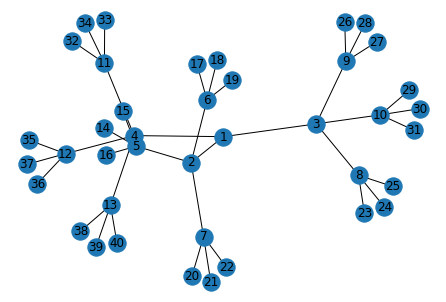

In [7]:
nx.draw(G, with_labels=True) # Visualizziamo il grafico

# Secondo grafico, Rt ad Agosto/Settembre

Fonti:
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4984
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4996
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&id=5011
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&id=5020
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&menu=notizie&p=dalministero&id=5025
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&id=5032
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&menu=notizie&p=dalministero&id=5044
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&menu=notizie&p=dalministero&id=5053
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&id=5061
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&id=5077
- http://www.salute.gov.it/portale/nuovocoronavirus/dettaglioNotizieNuovoCoronavirus.jsp?lingua=italiano&menu=notizie&p=dalministero&id=5093

In [8]:
# Otteniamo dati sui contagi giornalieri da repository ufficiale
raw_data = json.load(request.urlopen("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json"))
dates = []
values = []
for report in raw_data:
    # Dati compresi tra 15 Luglio e 30 Settembre
    date = pd.to_datetime(report['data'])
    if datetime.datetime(year=2020, month=7, day=15) < date < datetime.datetime(year=2020, month=9, day=30):
        dates.append(date)
        values.append(report['nuovi_positivi'])

# Dati Rt, Lista di date con corrispettivi valori Rt (Presi da monitoraggi settimanali ISS)
dates_rt = [
    datetime.datetime(year=2020, month=7, day=19), datetime.datetime(year=2020, month=7, day=26), 
    datetime.datetime(year=2020, month=8, day=2), datetime.datetime(year=2020, month=8, day=5), datetime.datetime(year=2020, month=8, day=12), datetime.datetime(year=2020, month=8, day=19), datetime.datetime(year=2020, month=8, day=26),
    datetime.datetime(year=2020, month=9, day=2), datetime.datetime(year=2020, month=9, day=9), datetime.datetime(year=2020, month=9, day=16), datetime.datetime(year=2020, month=9, day=23),
    ]
values_rt = [
    0.95, 0.98,
    1.01, 0.96, 0.83, 0.75, 1.18,
    1.14, 0.92, 0.95, 1.01,
]

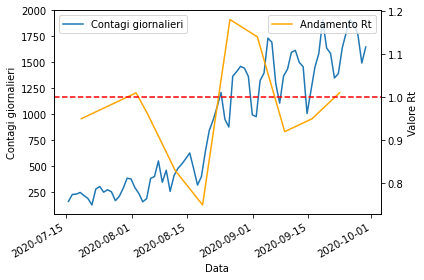

In [9]:
fig, ax = plt.subplots() # Creazione grafico
ax.plot_date(dates, values, linestyle='solid', marker=None) # Grafico andamento contagi
ax.set_xlabel("Data")
ax.set_ylabel("Contagi giornalieri")

ax2 = ax.twinx() # Duplica asse
ax2.plot(dates_rt, values_rt, color='orange', linestyle='solid') # Grafico Rt
ax2.set_ylabel("Valore Rt")
ax2.axhline(y=1, linestyle='dashed', color='red') # Linea orizzontale

ax.legend(['Contagi giornalieri'])
ax2.legend(['Andamento Rt'])
plt.gcf().autofmt_xdate() # Formatta le date in modo leggibile
plt.tight_layout()
plt.show()

In [10]:
fig.savefig('fig1.png', dpi=300)